In [1]:
#using Label encoder for Traps and species
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#importing data, spray data for the test set (2008,2010,2012,2014) is not provided. Therefore, spray info is not used for the analysis
train = pd.read_csv('./assets/train.csv')
test =pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray =pd.read_csv('./assets/spray.csv')
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

In [5]:
from datetime import datetime
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
weather['Date'] = pd.to_datetime(weather['Date'], format='%Y-%m-%d')
spray['Date'] = pd.to_datetime(spray['Date'], format='%Y-%m-%d')

In [6]:

train['week'] = train['Date'].dt.weekofyear
train['year'] = train['Date'].dt.year
test['week'] = test['Date'].dt.weekofyear
test['year'] = test['Date'].dt.year
spray['year']=spray['Date'].dt.year

In [167]:
train.columns


Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'week', u'year'],
      dtype='object')

In [7]:
train1 = train.drop(train[[1,3,4,6,7,8,9,10]], axis=1)

In [8]:
train1.head(1)

,Date,Species,Trap,WnvPresent,week,year
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,0,22,2007


In [170]:
test.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'week', u'year'],
      dtype='object')

In [9]:
test1 =test.drop(test[[0,2,4,5,7,8,9,10]], axis=1)

In [10]:
test1.head()

,Date,Species,Trap,week,year
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,24,2008
1,2008-06-11,CULEX RESTUANS,T002,24,2008
2,2008-06-11,CULEX PIPIENS,T002,24,2008
3,2008-06-11,CULEX SALINARIUS,T002,24,2008
4,2008-06-11,CULEX TERRITANS,T002,24,2008


In [173]:
#train = pd.concat([train , pd.get_dummies(train['Species'])], axis=1)  

In [174]:
#test = pd.concat([test , pd.get_dummies(test['Species'])], axis=1)  

In [175]:
#trap.loc[23,:]

In [176]:
#trap.loc[65,:]

In [177]:
#trap[trap["Trap" ]== 'T141' ] ##41.942285	-87.761726

In [178]:
#trap[trap["Trap" ]== 'T144' ] ##41.942285	-87.761726

In [11]:
w30 = pd.read_csv('weather_ave_30.csv')

In [12]:
w30 = w30.drop('Datetime_Date', axis=1)


In [13]:
w30['Date'] = pd.to_datetime(w30['Date'], format='%Y-%m-%d')

In [14]:
# Adding the weather data to the train and test data
train_add =train1.join(w30.set_index('Date'), on='Date')
test_add = test1.join(w30.set_index('Date'), on='Date')

In [31]:
from sklearn.preprocessing import LabelEncoder
train_add['Species'] = LabelEncoder().fit_transform(train_add['Species'])
test_add['Species'] = LabelEncoder().fit_transform(test_add['Species'])

In [32]:
train_add['Trap'] = LabelEncoder().fit_transform(train_add['Trap'])
test_add['Trap'] = LabelEncoder().fit_transform(test_add['Trap'])

In [183]:
#get dummies for species
#train_add = pd.concat([train_add , pd.get_dummies(train_add['Species'])], axis=1) 
#test_add = pd.concat([test_add , pd.get_dummies(test_add['Species'])], axis=1)  
#train_add['UNSPECIFIED CULEX']= 0


In [184]:
#get dummies for Traps
#train_add = pd.concat([train_add , pd.get_dummies(train_add['Trap'])], axis=1) 
#test_add = pd.concat([test_add , pd.get_dummies(test_add['Trap'])], axis=1)  



In [185]:
#train_add['T090A']= train_add['T090']
#train_add['T090B']= train_add['T090']
#train_add['T090C']= train_add['T090']
#train_add['T002A']= train_add['T002']
#train_add['T002B']= train_add['T002']
#train_add['T218A']= train_add['T218']
#train_add['T218B']= train_add['T218']
#train_add['T218C']= train_add['T218']
#train_add['T128A']= train_add['T128']
#train_add['T200A']= train_add['T200']
#train_add['T200B']= train_add['T200']
#train_add['T065A']= train_add['T065']
#train_add['T234']= train_add['T141'] # closest trap

In [34]:
train_add.head(2)


,Date,Species,Trap,week,year,Tmax,Tmin,Tavg,Depart,DewPoint,...,BC,SQ,FG+,MI,TS,DZ,RA,BR,FG,SN
0,2007-05-29,2,1,22,2007,90.0,42.0,63.275862,10.0,44.827586,...,0.0,0.0,0.0,0.0,0.068966,0.0,0.310345,0.310345,0.0,0.0
1,2007-05-29,3,1,22,2007,90.0,42.0,63.275862,10.0,44.827586,...,0.0,0.0,0.0,0.0,0.068966,0.0,0.310345,0.310345,0.0,0.0


In [33]:
test_add.head(2)

,Date,Species,Trap,week,year,Tmax,Tmin,Tavg,Depart,DewPoint,...,BC,SQ,FG+,MI,TS,DZ,RA,BR,FG,SN
0,2008-06-11,2,1,24,2008,87.0,40.0,61.566667,7.0,48.9,...,0.0,0.0,0.066667,0.0,0.3,0.066667,0.533333,0.266667,0.066667,0.0
1,2008-06-11,3,1,24,2008,87.0,40.0,61.566667,7.0,48.9,...,0.0,0.0,0.066667,0.0,0.3,0.066667,0.533333,0.266667,0.066667,0.0


In [41]:
test_add= test_add.drop('Date', axis=1)
train_add= train_add.drop('Date', axis=1)
#test_add= test_add.drop('Species', axis=1)
#train_add= train_add.drop('Species', axis=1)
#test_add= test_add.drop('Trap', axis=1)
#train_add= train_add.drop('Trap', axis=1)



In [42]:
print test_add.shape
print train_add.shape

(116293, 31)
(10506, 31)


In [24]:
y =train_add['WnvPresent']



In [25]:
train_add = train_add.drop('WnvPresent', axis=1)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold ,train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV



/Users/khaterehmohajery1/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
train_add.columns

Index([u'Species', u'Trap', u'week', u'year', u'Tmax', u'Tmin', u'Tavg',
       u'Depart', u'DewPoint', u'WetBulb', u'Heat', u'Cool', u'PrecipTotal',
       u'StnPressure', u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed',
       u'HZ', u'VC', u'FU', u'BC', u'SQ', u'FG+', u'MI', u'TS', u'DZ', u'RA',
       u'BR', u'FG', u'SN'],
      dtype='object')

In [44]:
train_add.dtypes

Species          int64
Trap             int64
week             int64
year             int64
Tmax           float64
Tmin           float64
Tavg           float64
Depart         float64
DewPoint       float64
WetBulb        float64
Heat           float64
Cool           float64
PrecipTotal    float64
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
HZ             float64
VC             float64
FU             float64
BC             float64
SQ             float64
FG+            float64
MI             float64
TS             float64
DZ             float64
RA             float64
BR             float64
FG             float64
SN             float64
dtype: object

In [45]:
X =train_add

In [43]:
#scaler = StandardScaler()
#X= scaler.fit_transform(X)


In [43]:
#test_add =scaler.fit_transform(test_add)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [58]:
##Grid search over Random Forest parameters
# model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:'
    print confusion
    print 'classification_report:'
    print cr
    print 'Accuracy of the model on test:',a
    return probabilities
#params = {'max_features ': [0.5,1.0],'max_depth':[0.5,1.0],'n_estimators':[5,10]}
max_depths = [0.3, 1.0]
max_features = [0.3,1.0]
n_estimators = [5000]

rf = RandomForestClassifier(n_jobs=-1,random_state = 33, class_weight='balanced')
gsrf = GridSearchCV(estimator = rf,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3,scoring='roc_auc')
gsrf.fit(X_train, y_train)
print 'best parameters for the model:',gsrf.best_params_
print 'best score on train:',gsrf.best_score_
probability = evaluate_model(gsrf.best_estimator_)


best parameters for the model: {'max_features': 0.3, 'n_estimators': 5000, 'max_depth': 1.0}
best score on train: 0.781025857027
confusion matrix:
   predicted_1  predicted_0
1          159           23
0         1386         1899
classification_report:
             precision    recall  f1-score   support

          0       0.99      0.58      0.73      3285
          1       0.10      0.87      0.18       182

avg / total       0.94      0.59      0.70      3467

Accuracy of the model on test: 0.593596769541


In [136]:
predictions =gsrf.best_estimator_.predict(test_add)


In [ ]:
predictions = pd.Series(predictions)
submit= pd.concat([test['Id'], predictions], axis= 1)
submit.columns=['Id','WnvPresent']
submit.to_csv('gsrf.csv',index = False)

In [94]:
probabilities_rf = gsrf.best_estimator_.predict_proba(test_add)
pro_rf =probabilities_rf[:,1]

In [90]:
pro_rf = pd.Series(pro_rf)
submit= pd.concat([test['Id'], pro_rf], axis= 1)
submit.columns=['Id','WnvPresent']
submit.to_csv('gsrf2_pro.csv',index = False)

In [46]:
##Grid search over Knn parameters
# model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:'
    print confusion
    print 'classification_report:'
    print cr
    print 'Accuracy of the model on test:',a
    return probabilities

n_neighbors =  range(5, 30)
knn = KNeighborsClassifier()
gsknn = GridSearchCV(estimator = knn,param_grid=dict( n_neighbors=n_neighbors), n_jobs=-1,cv=3,scoring='roc_auc')
gsknn.fit(X_train, y_train)
print 'best parameters for the model:',gsknn.best_params_
print 'best score on train:',gsknn.best_score_
probability = evaluate_model(gsknn.best_estimator_)


best parameters for the model: {'n_neighbors': 26}
best score on train: 0.781501809087
confusion matrix:
   predicted_1  predicted_0
1            0          182
0            0         3285
classification_report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3285
          1       0.00      0.00      0.00       182

avg / total       0.90      0.95      0.92      3467

Accuracy of the model on test: 0.947505047592


In [57]:
probabilities_gslg_label = gslg.best_estimator_.predict_proba(test_add)
pro_gslg_label =probabilities_gslg_label[:,1]
pro_gslg_label = pd.Series(pro_gslg_label)
submit= pd.concat([test['Id'], pro_gslg_label], axis= 1)
submit.columns=['Id','WnvPresent']
submit.to_csv('gslg_pro_label.csv',index = False)


In [47]:
##Grid search over Gradiant boosting
# model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:'
    print confusion
    print 'classification_report:'
    print cr
    print 'Accuracy of the model on test:',a
    return probabilities
#params = {'max_features ': [0.5,1.0],'max_depth':[0.5,1.0],'n_estimators':[5,10]}
max_depths = [0.3, 1.0]
max_features = [0.3,1.0]
n_estimators = [5000]

gbc = GradientBoostingClassifier(random_state = 33)
gsgbc = GridSearchCV(estimator = gbc,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3,scoring='roc_auc')
gsgbc.fit(X_train, y_train)
print 'best parameters for the model:',gsgbc.best_params_
print 'best score on train:',gsgbc.best_score_
probability = evaluate_model(gsgbc.best_estimator_)



best parameters for the model: {'max_features': 1.0, 'n_estimators': 5000, 'max_depth': 1.0}
best score on train: 0.829711318205
confusion matrix:
   predicted_1  predicted_0
1            0          182
0            3         3282
classification_report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3285
          1       0.00      0.00      0.00       182

avg / total       0.90      0.95      0.92      3467

Accuracy of the model on test: 0.946639746178


In [ ]:
predictions_gbc_label=gsgbc.best_estimator_.predict(test_add)

In [49]:
probabilities_gbc_label = gsgbc.best_estimator_.predict_proba(test_add)
pro_gbc_label =probabilities_gbc_label[:,1]

In [ ]:
predictions_gbc_label = pd.Series(predictions_gbc_label)
submit= pd.concat([test['Id'], predictions_gbc_label], axis= 1)
submit.columns=['Id','WnvPresent']
submit.to_csv('gbc_label.csv',index = False)

In [50]:
pro_gbc_label = pd.Series(pro_gbc_label)
submit= pd.concat([test['Id'], pro_gbc_label], axis= 1)
submit.columns=['Id','WnvPresent']
submit.to_csv('gbc_pro_label.csv',index = False)

In [51]:
gbc_features =gsgbc.best_estimator_.fit(X_train, y_train)

In [52]:
importances = gsgbc.best_estimator_.feature_importances_

In [202]:
X.columns


Index([u'week', u'year', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool',
       ...
       u'T002A', u'T002B', u'T218A', u'T218B', u'T218C', u'T128A', u'T200A',
       u'T200B', u'T065A', u'T234'],
      dtype='object', length=186)

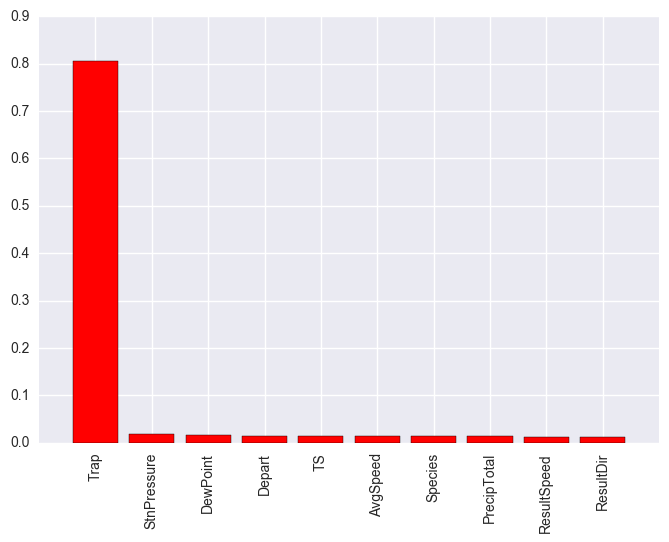

In [53]:

importances = gsgbc.best_estimator_.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

#std = np.std([tree.feature_importances_ for tree in gbc_features.estimators_], axis=0)
sns.set_style("darkgrid")

indices = np.argsort(importances)[-1:-11:-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure()
#plt.title("Feature importances")
plt.bar(range(10), importances[indices],
       color="r",  align="center")
plt.xticks(range(10), feature_names[indices], rotation=90)
plt.xlim([-1, 10])
plt.savefig('Feature_Importance.png')
plt.show()

In [54]:
feature_importances = pd.DataFrame(gbc_features.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)

,importance
Trap,0.8052
StnPressure,0.0186
DewPoint,0.0156
Depart,0.0150
TS,0.0148
AvgSpeed,0.0144
Species,0.0136
PrecipTotal,0.0132
ResultSpeed,0.0116
ResultDir,0.0112


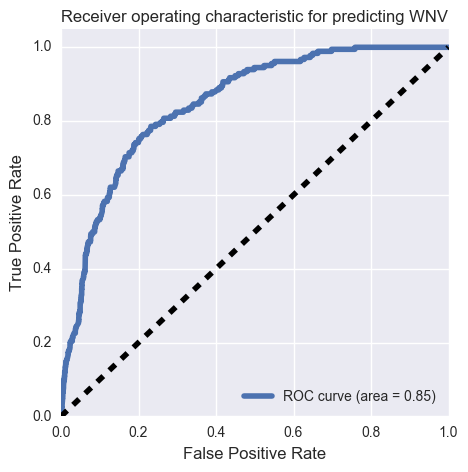

In [55]:
from sklearn.metrics import roc_auc_score,roc_curve, auc
probabilities = gsgbc.best_estimator_.predict_proba(X_test)
y_score=[]
for i in range(0,len(probabilities)):
    y_score.append(probabilities[i][1])


FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic for predicting WNV', fontsize=12)
plt.legend(loc="lower right")
plt.savefig('ROC_AUC.png')
plt.show()


In [83]:
#reading the probebilities from Logistic reg model(I deleted the model) 
data = pd.read_csv('gslg_pro_label.csv')


In [84]:
data['Wn2']= pro_gbc_label

In [85]:
#stacking two models
data['WnvPresent']= (0.7 *data['Wn2']+0.3 * data['WnvPresent'])

In [86]:
data =data.drop('Wn2',axis =1)
data.head()

,Id,WnvPresent
0,1,0.001165
1,2,0.000566
2,3,0.001277
3,4,0.000081
4,5,0.000074


In [79]:
data.isnull().sum()

Id            0
WnvPresent    0
dtype: int64

In [87]:
data.to_csv('gbc_lg_label.csv',index = False)

In [100]:
#stacking 3 models DID NOT WORK AS GOOD AS THE LOGISTIC REG +GB
data = pd.read_csv('gslg_pro_label.csv')
data['Wn1']= pro_gbc_label
data['Wn2']=pro_rf
data['WnvPresent']= 0.6 *data['Wn1']+0.1 * data['WnvPresent']+0.3*data['Wn2']
data =data.drop(['Wn2','Wn1'],axis =1)
data.to_csv('gbc_lg_rf_label.csv',index = False)